In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

import missingno as msno


import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics



from scipy.stats.mstats import winsorize

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA

In [2]:
# !pip install lazypredict

In [3]:
# !pip uninstall scikit-learn -y
# # 

In [4]:
# !pip install scikit-learn==0.23.1

### Reading CSV files

In [5]:
df_2014 = pd.read_csv("2014_Financial_Data.csv")
df_2015 = pd.read_csv("2015_Financial_Data.csv")
df_2016 = pd.read_csv("2016_Financial_Data.csv")
df_2017 = pd.read_csv("2017_Financial_Data.csv")
df_2018 = pd.read_csv("2018_Financial_Data.csv")

In [6]:
nasdaq = pd.read_csv("nasdaq.csv")

In [7]:
nasdaq.shape

(7998, 3)

In [8]:
nasdaq.columns

Index(['Symbol', 'Name', 'Country'], dtype='object')

In [9]:
nasdaq.head()

,Symbol,Name,Country
0,A,Agilent Technologies Inc. Common Stock,United States
1,AA,Alcoa Corporation Common Stock,NaN
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,NaN
3,AACG,ATA Creativity Global American Depositary Shares,China
4,AACIU,Armada Acquisition Corp. I Unit,United States


In [10]:
nasdaq.drop('Name', axis=1, inplace=True)

In [11]:
df_2014.shape

(3808, 225)

In [12]:
df_2015.shape

(4120, 225)

In [13]:
df_2016.shape

(4797, 225)

In [14]:
df_2017.shape

(4960, 225)

In [15]:
df_2018.shape

(4392, 225)

In [16]:
df_2014['Year'] = 2014
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018

In [17]:
df_2014.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015 PRICE VAR [%]', 'Class', 'Year'],
      dtype='object', length=226)

In [18]:
df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2015.rename(columns={'2016 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2016.rename(columns={'2017 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2017.rename(columns={'2018 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2018.rename(columns={'2019 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [19]:
df = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018], axis = 0)

In [20]:
df.shape

(22077, 226)

In [21]:
df.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Next_Year_Price_Var[%]', 'Class', 'Year'],
      dtype='object', length=226)

In [22]:
df.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,2014
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,2014
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,2014
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,2014
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,2014


In [23]:
df.rename(columns={"Unnamed: 0": "Symbol"}, inplace=True)
# df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [24]:
df = pd.merge(df, nasdaq, how="inner", on="Symbol")

In [25]:
df.shape

(18703, 227)

In [26]:
df.head()

,Symbol,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Year,Country
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,...,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,-9.323276,0,2014,United States
1,PG,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,...,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,10.809451,1,2015,United States
2,PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,...,-0.0182,-0.0627,0.0083,0.0,-0.0809,Consumer Defensive,12.532463,1,2016,United States
3,PG,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,...,-0.0529,0.0012,0.0325,0.0,-0.0156,Consumer Defensive,4.975151,1,2017,United States
4,PG,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,...,-0.0174,-0.0357,-0.0097,0.0,0.0205,Consumer Defensive,40.680273,1,2018,United States


In [27]:
df.Country.value_counts()

United States     14964
Canada              607
China               389
Israel              304
United Kingdom      190
Bermuda             156
Netherlands         102
Brazil               93
Ireland              80
Switzerland          76
Greece               75
Argentina            63
Mexico               60
India                53
France               49
Australia            46
Taiwan               45
South Korea          45
Cayman Islands       45
Germany              39
Hong Kong            37
Luxembourg           35
South Africa         35
Japan                35
Chile                30
Singapore            30
Denmark              23
Belgium              20
Spain                20
Monaco               15
Colombia             15
Puerto Rico          15
Peru                 15
Sweden               15
Russia               10
Curacao              10
Italy                10
Jersey               10
Panama               10
Turkey                5
Cyprus                5
Finland         

In [28]:
df.Country.isnull().sum()

787

In [29]:
#Next_Year_Price_Var[%] +ve ---> class = 1, if -ve -----> class = 0
# df.drop('Next_Year_Price_Var[%]', axis=1, inplace=True)

In [30]:
df.rename(columns={"Symbol":"Name"}, inplace=True)

In [31]:
df.Name.nunique()

4116

In [32]:
df.shape

(18703, 227)

In [33]:
df.info

<bound method DataFrame.info of         Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1         PG  7.074900e+10         -0.0491     3.705600e+10  3.369300e+10   
2         PG  6.529900e+10         -0.0770     3.290900e+10  3.239000e+10   
3         PG  6.505800e+10         -0.0037     3.263800e+10  3.242000e+10   
4         PG  6.683200e+10          0.0273     3.443200e+10  3.240000e+10   
...      ...           ...             ...              ...           ...   
18698    BAK  1.494842e+10          0.0047     1.196681e+10  2.981610e+09   
18699    DNB  3.011000e+09             NaN     2.325000e+09  6.860000e+08   
18700   HYAC           NaN             NaN              NaN           NaN   
18701  HYACU           NaN             NaN              NaN           NaN   
18702    LCA  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   

       R&D Expenses  SG&A Expense  Operatin

In [34]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Next_Year_Price_Var[%],Class,Year
count,1.786500e+04,17335.000000,1.739000e+04,1.784100e+04,1.719400e+04,1.746200e+04,1.740500e+04,1.792300e+04,1.738800e+04,1.778000e+04,...,17283.000000,17015.000000,17053.000000,16664.000000,16865.000000,16999.000000,17053.000000,1.870300e+04,18703.000000,18703.000000
mean,5.131141e+09,4.044478,3.194422e+09,2.017499e+09,1.099452e+08,9.257510e+08,1.427406e+09,6.293855e+08,9.737632e+07,5.375073e+08,...,12.531312,0.153511,0.829158,0.871056,3.682542,0.296431,0.257921,2.789284e+02,0.563706,2016.085548
std,2.094265e+10,335.687819,1.515262e+10,8.058267e+09,8.007416e+08,3.954889e+09,5.768307e+09,2.986434e+09,4.666766e+08,2.587647e+09,...,1183.058348,3.057425,43.258736,57.650800,184.199300,13.801622,3.901991,2.087712e+04,0.495938,1.378392
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-379.478300,-1.051000,-2.662200,-2.369900,-1.003972e+02,0.000000,2014.000000
25%,6.571986e+07,-0.011300,3.883750e+06,3.512800e+07,0.000000e+00,1.887951e+07,3.835900e+07,-2.692896e+06,0.000000e+00,-6.229009e+06,...,-0.047100,0.000000,-0.025900,-0.093025,-0.064400,0.000000,-0.010900,-1.747184e+01,0.000000,2015.000000
50%,4.771070e+08,0.058600,1.717705e+08,2.137290e+08,0.000000e+00,8.901150e+07,1.664520e+08,4.391900e+07,3.823064e+06,3.094914e+07,...,0.010900,0.000000,0.049500,0.035300,0.000000,0.000000,0.060500,5.125095e+00,1.000000,2016.000000
75%,2.565486e+09,0.178700,1.333174e+09,9.678560e+08,1.265675e+07,4.091312e+08,6.747880e+08,2.880000e+08,5.092050e+07,2.287124e+08,...,0.195450,0.064200,0.173500,0.141525,0.150300,0.000000,0.179300,2.872061e+01,1.000000,2017.000000
max,8.482620e+11,42138.663900,3.861020e+11,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,324.926800,2.418601e+06,1.000000,2018.000000


In [35]:
## Removing "Year" because our future companies will have different years and it should not affect our final call
df.drop("Year", axis=1, inplace=True)

In [36]:
## Removing "Name" because our future companies will have different Name and it should not affect our final call
df.drop("Name", axis=1, inplace=True)

In [37]:
df.head(2)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Country
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,1.449400e+10,...,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,-9.323276,0,United States
1,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,9.761000e+09,...,-0.2634,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,10.809451,1,United States


In [38]:
df.loc[(df.Country=="United States")].shape

(14964, 225)

In [39]:
df.loc[(df.Country=="United States")]

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Next_Year_Price_Var[%],Class,Country
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,709000000.0,1.449400e+10,...,-0.0217,0.0359,0.0316,0.1228,0.0,-0.1746,Consumer Defensive,-9.323276,0,United States
1,7.074900e+10,-0.0491,3.705600e+10,3.369300e+10,0.0,2.061600e+10,2.264400e+10,1.104900e+10,626000000.0,9.761000e+09,...,-0.2634,-0.1024,-0.1013,-0.1432,0.0,-0.0394,Consumer Defensive,10.809451,1,United States
2,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.0,1.894900e+10,1.894900e+10,1.344100e+10,579000000.0,1.385000e+10,...,-0.0528,-0.0182,-0.0627,0.0083,0.0,-0.0809,Consumer Defensive,12.532463,1,United States
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,...,-0.0195,-0.0529,0.0012,0.0325,0.0,-0.0156,Consumer Defensive,4.975151,1,United States
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,...,0.0247,-0.0174,-0.0357,-0.0097,0.0,0.0205,Consumer Defensive,40.680273,1,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18697,NaN,NaN,NaN,3.648000e+09,NaN,NaN,7.947000e+09,2.206000e+09,-43000000.0,NaN,...,0.0000,0.2680,0.2433,-0.0196,NaN,NaN,Consumer Cyclical,-5.891175,0,United States
18699,3.011000e+09,NaN,2.325000e+09,6.860000e+08,NaN,6.230000e+08,6.100000e+08,7.600000e+07,94000000.0,1.600000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1.123204,1,United States
18700,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06,-5.000000e+06,NaN,1.000000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,1.525253,1,United States
18701,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+06,-5.000000e+06,NaN,1.000000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,Industrials,3.960392,1,United States


In [40]:
# Selecting only United States

In [41]:
df.Country.value_counts()

United States     14964
Canada              607
China               389
Israel              304
United Kingdom      190
Bermuda             156
Netherlands         102
Brazil               93
Ireland              80
Switzerland          76
Greece               75
Argentina            63
Mexico               60
India                53
France               49
Australia            46
Taiwan               45
South Korea          45
Cayman Islands       45
Germany              39
Hong Kong            37
Luxembourg           35
South Africa         35
Japan                35
Chile                30
Singapore            30
Denmark              23
Belgium              20
Spain                20
Monaco               15
Colombia             15
Puerto Rico          15
Peru                 15
Sweden               15
Russia               10
Curacao              10
Italy                10
Jersey               10
Panama               10
Turkey                5
Cyprus                5
Finland         

In [42]:
df = df.loc[(df.Country=="United States")]

In [43]:
df.drop('Country', axis=1, inplace=True)

### Understanding Null Value Distribution

In [44]:
df.isnull().sum().sort_values(ascending=False)

cashConversionCycle               14964
operatingCycle                    14964
shortTermCoverageRatios            7418
priceEarningsToGrowthRatio         5473
dividendPayoutRatio                5473
                                  ...  
Net cash flow / Change in cash      716
Financing Cash Flow                 699
Next_Year_Price_Var[%]                0
Sector                                0
Class                                 0
Length: 224, dtype: int64

In [45]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

cashConversionCycle               100.000000
operatingCycle                    100.000000
shortTermCoverageRatios            49.572307
priceEarningsToGrowthRatio         36.574445
dividendPayoutRatio                36.574445
                                     ...    
Net cash flow / Change in cash      4.784817
Financing Cash Flow                 4.671211
Next_Year_Price_Var[%]              0.000000
Sector                              0.000000
Class                               0.000000
Length: 224, dtype: float64

In [46]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=True).head(15)

Class                             0.000000
Sector                            0.000000
Next_Year_Price_Var[%]            0.000000
Financing Cash Flow               4.671211
Net cash flow / Change in cash    4.784817
Operating Income                  4.844961
Receivables                       4.851644
Revenue                           4.998663
Earnings Before Tax Margin        5.052125
Gross Margin                      5.078856
Operating Cash Flow               5.145683
Gross Profit                      5.239241
Retained earnings (deficit)       5.339481
Cash and cash equivalents         5.352847
Earnings before Tax               5.526597
dtype: float64

In [47]:
# all cols have some null values
len(df.isnull().any())

224

In [48]:
# No columns with all null values
df.columns[df.isnull().all()]

Index(['operatingCycle', 'cashConversionCycle'], dtype='object')

In [49]:
# Defining a funtion to add the count/frequency values as annotation to histogram.
def annotate_graph(ax):
    for bar in ax.patches:         
        ax.annotate(format((bar.get_height()), '.0f'),                    
                    (bar.get_x() + bar.get_width() / 2,  bar.get_height()),                    
                    ha='center', va='center',                    
                    size=10, xytext=(0, 8),                    
                    textcoords='offset points')
    return ax

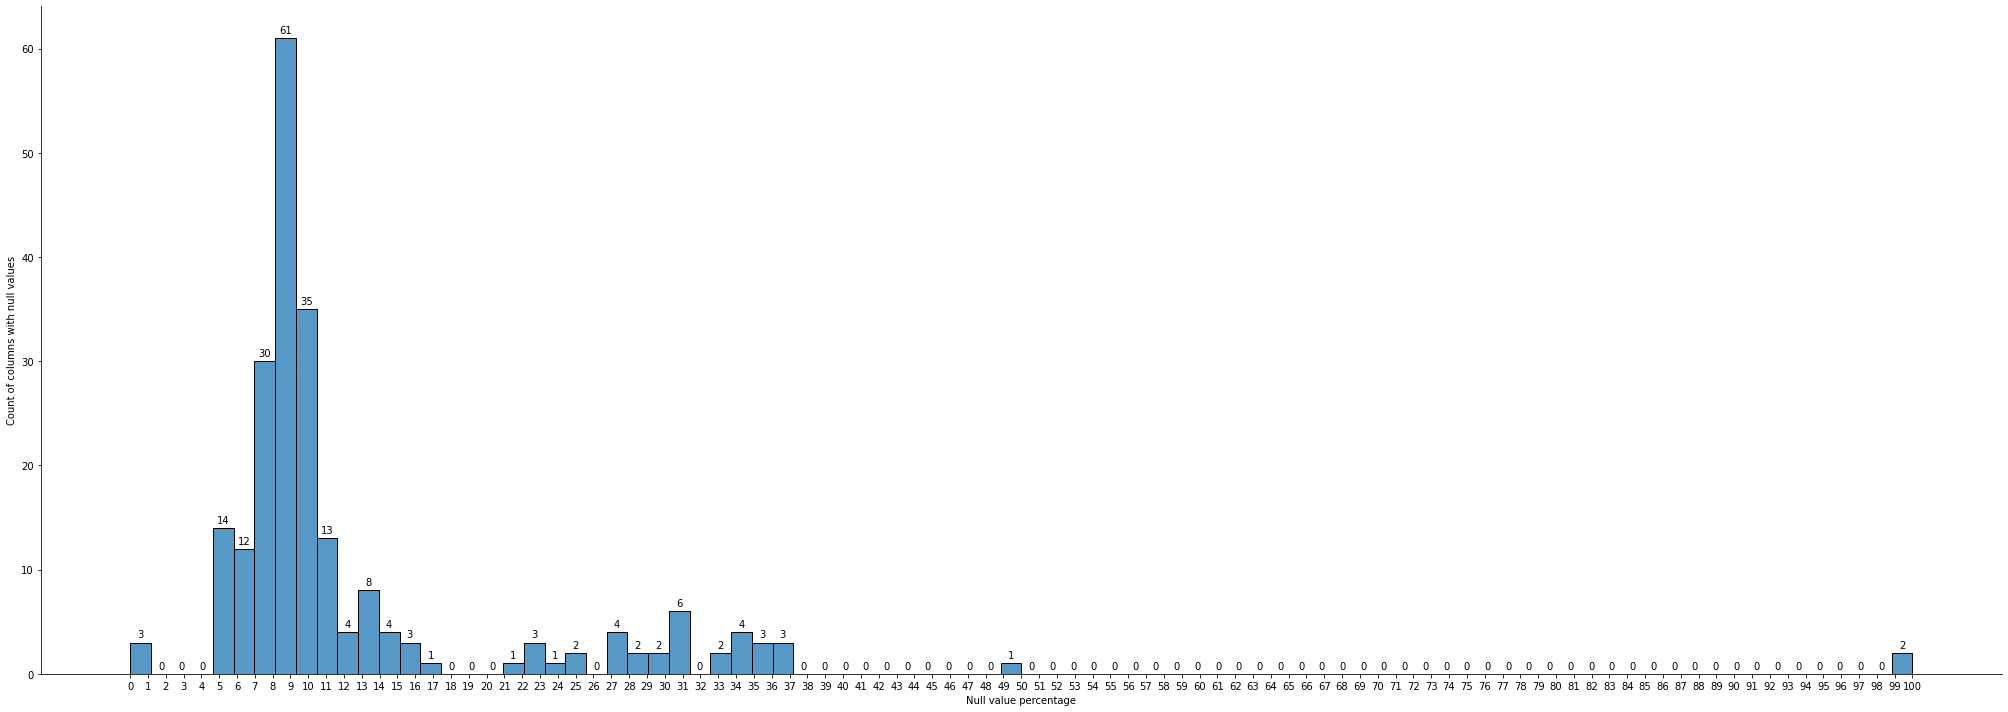

In [50]:
# Plotting histogram for the dataframe and columns having null values.
plt.figure(figsize=(28,10))

ax = sns.histplot(round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
ax = annotate_graph(ax)

ax.set(xticks=np.arange(0,101))
ax.set(xlabel='Null value percentage', ylabel='Count of columns with null values')
sns.despine()
plt.tight_layout()

<AxesSubplot:>

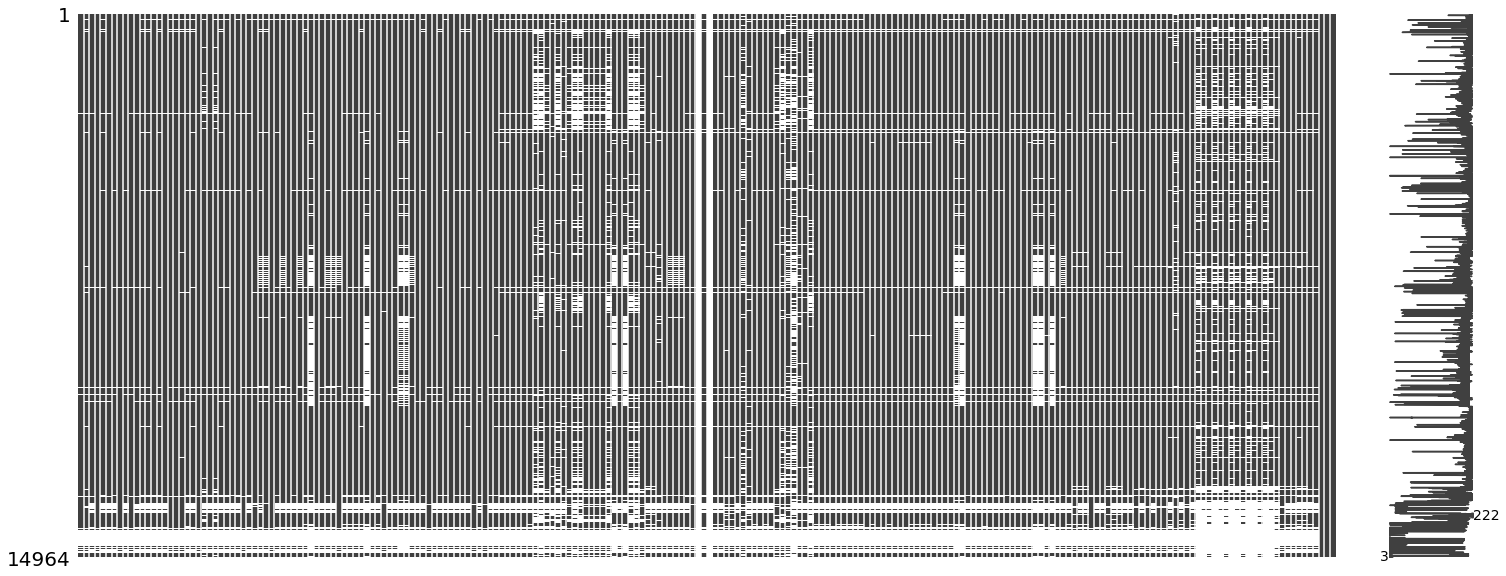

In [51]:
msno.matrix(df)

In [52]:
# defining a function to get more than cutoff percent missing value

def get_missing_value_percentage(cutoff):
    y = pd.DataFrame( round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
    y.rename(columns={0:"Percentage"}, inplace=True)
    y2 = y[y.Percentage>cutoff]
    return y2

In [53]:
# get columns with more than 70% missing values
greater_than_70 = get_missing_value_percentage(70)

In [54]:
len(greater_than_70)

2

In [55]:
greater_than_70

,Percentage
cashConversionCycle,100.0
operatingCycle,100.0


In [56]:
# get columns with more than 50% missing values
greater_than_50 = get_missing_value_percentage(50)

In [57]:
len(greater_than_50)

2

In [58]:
greater_than_50

,Percentage
cashConversionCycle,100.0
operatingCycle,100.0


In [59]:
# get columns with more than 20% missing values
greater_than_20 = get_missing_value_percentage(20)
greater_than_20

,Percentage
cashConversionCycle,100.00
operatingCycle,100.00
shortTermCoverageRatios,49.57
priceEarningsToGrowthRatio,36.57
dividendPayoutRatio,36.57
10Y Shareholders Equity Growth (per Share),36.44
10Y Revenue Growth (per Share),35.74
10Y Net Income Growth (per Share),35.74
10Y Operating CF Growth (per Share),35.52
nIperEBT,34.60


### Removing Null Values

In [60]:
# function to drop cols which have more than 20% null values

def remove_cols_with_nulls (df, threshold):
    myCol = list(df.columns)
    for col in myCol: 
        percentage = (df[col].isnull().sum()/len(df[col]))*100
        if percentage>threshold:
            df.drop(col, axis=1, inplace=True)

In [61]:
df.shape

(14964, 224)

In [62]:
remove_cols_with_nulls(df, 20)

In [63]:
df.shape

(14964, 188)

In [64]:
len(df.columns[(df.isnull().any())])

185

In [65]:
# Deleting rows with any null value
df.dropna(how='all',axis=0, inplace=True) 

In [66]:
# Therefore, there is no row will all NULL values
df.shape

(14964, 188)

In [67]:
# Deleting rows with any null value
df.dropna(how='any',axis=0, inplace=True) 

In [68]:
df.shape

(9358, 188)

<AxesSubplot:>

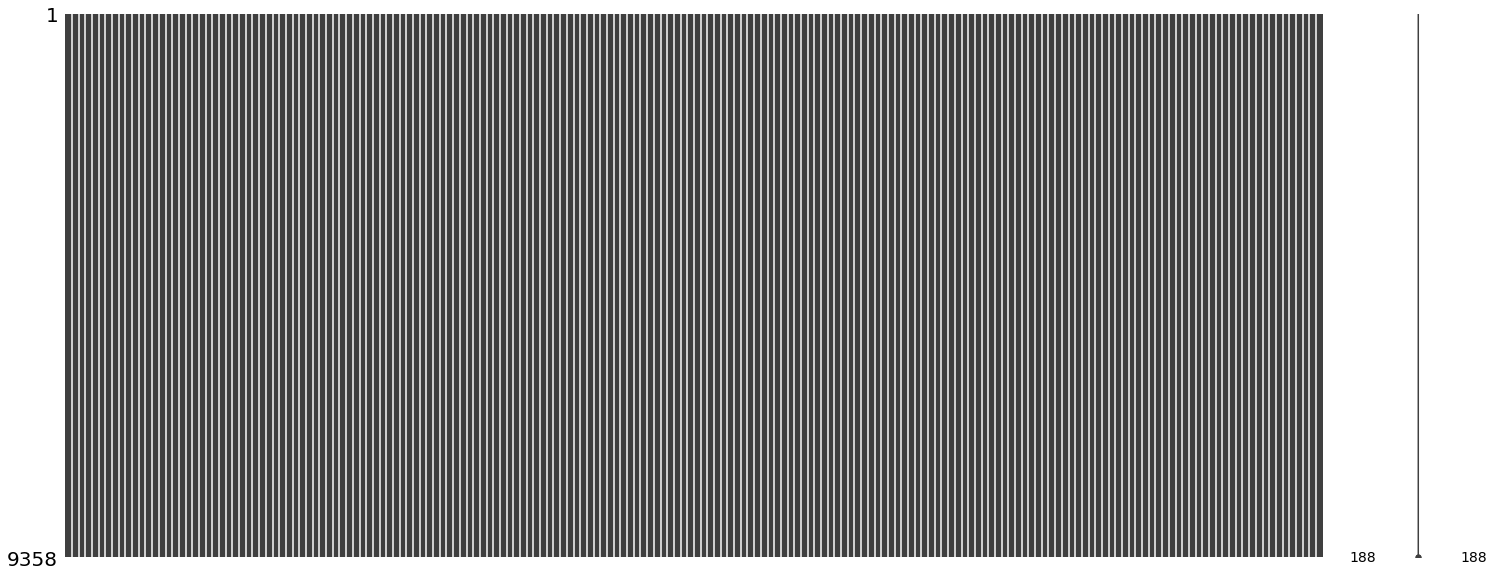

In [69]:
msno.matrix(df)

In [70]:
df.isnull().any().sum()

0

In [71]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', 'Next_Year_Price_Var[%]', 'Class'],
      dtype='object', length=188)

In [72]:
df.select_dtypes('number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Next_Year_Price_Var[%],Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,0.0,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,...,0.0329,0.0505,-0.0195,-0.0529,0.0012,0.0325,0.0000,-0.0156,4.975151,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,0.0,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,...,0.0241,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0000,0.0205,40.680273,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,0.0,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,...,0.1651,0.1344,0.0065,0.0415,0.0535,0.0254,0.0000,0.1293,-15.036503,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,0.0,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,...,0.2650,0.3697,0.0844,0.1115,0.2797,0.0416,0.0000,0.0457,-17.068252,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,0.0,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,...,0.1359,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0000,0.0678,-0.990449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18678,8.271740e+08,0.5215,6.392980e+08,1.878760e+08,0.0,7.599300e+07,2.158220e+08,-2.794600e+07,22315000.0,-5.060800e+07,...,0.0000,0.5546,3.1131,0.9714,0.2623,0.7721,0.0000,0.5336,-65.955592,0
18682,4.134120e+08,0.0092,2.405600e+08,1.728520e+08,0.0,3.000500e+07,5.833300e+07,1.145190e+08,20694000.0,8.491100e+07,...,0.0000,-0.2110,0.0000,0.0112,0.6327,-0.4436,0.0000,-0.1174,101.183423,1
18691,1.901740e+08,0.5127,3.787500e+07,1.522990e+08,39379000.0,1.475440e+08,1.869230e+08,-3.462400e+07,0.0,-3.230900e+07,...,0.0000,0.5777,0.0000,1.4482,1.7272,0.0000,0.1734,0.4790,16.804819,1
18693,3.702738e+07,0.3446,2.569266e+07,1.133472e+07,4001757.0,1.050856e+07,1.451031e+07,-3.175589e+06,65693.0,-2.533062e+06,...,0.0000,1.0298,0.8461,1.1314,0.8599,-0.5862,0.4892,0.6349,-2.415457,0


In [73]:
df['R&D Expenses'].value_counts()

0.000000e+00    6043
1.050000e+08       3
8.200000e+07       3
7.310000e+07       3
6.910000e+06       2
                ... 
1.370000e+08       1
2.544400e+08       1
7.661000e+08       1
5.726000e+09       1
7.445200e+07       1
Name: R&D Expenses, Length: 3238, dtype: int64

In [74]:
df.shape[0]

9358

In [75]:
df['R&D Expenses'].value_counts(normalize=True).sort_values(ascending=False)[0]

0.645757640521479

In [76]:
# more than 50% value of R&D expense is 0. Remove numeric cols with dominant values

In [77]:
df.operatingProfitMargin.value_counts().sort_values(ascending=False).iloc[0]

9358

In [78]:
#Code goes to except block when single value is met ---> which is SERIES and you cannot do simple indexing in SERIES

In [79]:
counter = 0
for col in list(df.select_dtypes('number').columns):
    try:  
        val = df[col].value_counts(normalize=True).sort_values(ascending=False)[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
    except:
        val = df[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
        
    
print("Total Columns Deleted = ",counter)

Total Columns Deleted =  15


In [80]:
df.shape

(9358, 173)

In [81]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       '3Y Shareholders Equity Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'SG&A Expenses Growth', 'Sector',
       'Next_Year_Price_Var[%]', 'Class'],
      dtype='object', length=173)

In [82]:
df.select_dtypes(include='number')

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,3Y Net Income Growth (per Share),3Y Shareholders Equity Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,SG&A Expenses Growth,Next_Year_Price_Var[%],Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0.1167,-0.0552,0.0505,-0.0195,-0.0529,0.0012,0.0325,-0.0156,4.975151,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0.1435,-0.0328,0.0200,0.0247,-0.0174,-0.0357,-0.0097,0.0205,40.680273,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0.5114,0.1781,0.1344,0.0065,0.0415,0.0535,0.0254,0.1293,-15.036503,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0.1455,0.2139,0.3697,0.0844,0.1115,0.2797,0.0416,0.0457,-17.068252,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0.1237,0.1073,-0.0490,0.0637,0.0769,0.0071,0.1654,0.0678,-0.990449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18678,8.271740e+08,0.5215,6.392980e+08,1.878760e+08,7.599300e+07,2.158220e+08,-2.794600e+07,22315000.0,-5.060800e+07,2.375000e+06,...,0.0000,-0.0304,0.5546,3.1131,0.9714,0.2623,0.7721,0.5336,-65.955592,0
18682,4.134120e+08,0.0092,2.405600e+08,1.728520e+08,3.000500e+07,5.833300e+07,1.145190e+08,20694000.0,8.491100e+07,2.120700e+07,...,1.2723,0.0853,-0.2110,0.0000,0.0112,0.6327,-0.4436,-0.1174,101.183423,1
18691,1.901740e+08,0.5127,3.787500e+07,1.522990e+08,1.475440e+08,1.869230e+08,-3.462400e+07,0.0,-3.230900e+07,1.337000e+06,...,0.0000,0.0000,0.5777,0.0000,1.4482,1.7272,0.0000,0.4790,16.804819,1
18693,3.702738e+07,0.3446,2.569266e+07,1.133472e+07,1.050856e+07,1.451031e+07,-3.175589e+06,65693.0,-2.533062e+06,-1.396784e+06,...,0.0000,0.2799,1.0298,0.8461,1.1314,0.8599,-0.5862,0.6349,-2.415457,0


In [83]:
df.select_dtypes(include='object')

,Sector
3,Consumer Defensive
4,Consumer Defensive
11,Consumer Defensive
12,Consumer Defensive
13,Consumer Defensive
...,...
18678,Energy
18682,Financial Services
18691,Technology
18693,Technology


In [84]:
df.select_dtypes(include='number').shape

(9358, 172)

In [85]:
df.select_dtypes(include='object').shape

(9358, 1)

In [86]:
df.select_dtypes(include='category').shape

(9358, 0)

In [87]:
df.shape

(9358, 173)

In [88]:
# 155 cols ----> 154 number, 1 Object

In [89]:
df.Sector.value_counts()

Technology                1624
Industrials               1511
Healthcare                1367
Financial Services        1304
Consumer Cyclical         1239
Basic Materials            498
Real Estate                495
Consumer Defensive         462
Energy                     461
Utilities                  293
Communication Services     104
Name: Sector, dtype: int64

In [90]:
sector_list = list(df.Sector.unique())

In [91]:
sector_list

['Consumer Defensive',
 'Basic Materials',
 'Healthcare',
 'Consumer Cyclical',
 'Industrials',
 'Real Estate',
 'Communication Services',
 'Energy',
 'Financial Services',
 'Utilities',
 'Technology']

In [92]:
pd.get_dummies(df.Sector, drop_first=True)

,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18678,0,0,0,1,0,0,0,0,0,0
18682,0,0,0,0,1,0,0,0,0,0
18691,0,0,0,0,0,0,0,0,1,0
18693,0,0,0,0,0,0,0,0,1,0


In [93]:
Sector_status = pd.get_dummies(df.Sector, drop_first=True)

#Adding the result to the original housing dataframe

df = pd.concat([df, Sector_status], axis=1)


In [94]:
# Droppig Sector Column as we are done with 
df.drop("Sector", axis=1, inplace=True)

In [95]:
df.shape

(9358, 182)

In [96]:
df.Energy.value_counts()

0    8897
1     461
Name: Energy, dtype: int64

In [97]:
# Sector Column will be dropped after Exploratory Data Analysis

In [98]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,0,1,0,0,0,0,0,0,0
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,0,1,0,0,0,0,0,0,0
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,0,1,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,0,1,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,0,1,0,0,0,0,0,0,0


# Removing columns with single value

In [99]:
def removeSingleValue (col):
    length = len(df[col].value_counts())
    if (length<2):
        print(col)
        df.drop(col, axis=1, inplace=True)

In [100]:
for col in df.columns:
    removeSingleValue(col)

In [101]:
num_col = list(df.dtypes[df.dtypes !='object'].index)

In [102]:
len(num_col)

182

In [103]:
df.shape

(9358, 182)

### Duplicate Row Checker

In [104]:
df.duplicated().sum()

0

In [105]:
# Moving "Class" Column to end
df['Result'] = df.Class
df.drop("Class", axis=1, inplace=True)
df = df.rename(columns={"Result":"Class"})

In [106]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,1,0,0,0,0,0,0,0,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,1,0,0,0,0,0,0,0,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,1,0,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,1,0,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,1,0,0,0,0,0,0,0,0


# Outlier Treatment

In [107]:
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities,Class
3,6.505800e+10,-0.0037,3.263800e+10,3.242000e+10,1.865400e+10,1.865400e+10,1.376600e+10,465000000.0,1.838900e+10,3.063000e+09,...,0,1,0,0,0,0,0,0,0,1
4,6.683200e+10,0.0273,3.443200e+10,3.240000e+10,1.903700e+10,1.903700e+10,1.336300e+10,506000000.0,1.321500e+10,3.465000e+09,...,0,1,0,0,0,0,0,0,0,1
11,1.084650e+11,0.1026,8.551200e+10,2.295300e+10,1.716100e+10,1.981600e+10,3.137000e+09,488000000.0,2.630000e+09,9.020000e+08,...,0,1,0,0,0,0,0,0,0,0
12,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,1.794600e+10,2.075800e+10,3.576000e+09,482000000.0,3.084000e+09,1.045000e+09,...,0,1,0,0,0,0,0,0,0,0
13,1.153370e+11,0.0501,8.950200e+10,2.583500e+10,1.916200e+10,2.238300e+10,3.452000e+09,522000000.0,2.932000e+09,9.570000e+08,...,0,1,0,0,0,0,0,0,0,0


## Method 1 Standard Deviation Method

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

In [108]:
df.shape

(9358, 182)

In [109]:
# Extracting numerical columns from the telecom_df data frame.
numerical_cols = df.select_dtypes(include = np.number).columns.to_list()

In [110]:
# calculate summary statistics
data = df[numerical_cols]
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 2.5
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = df[((df < lower) | (df > upper)).any(axis=1)]
print('Number of identified outliers: %d' % len(outliers))

Number of identified outliers: 4779


In [111]:
# remove outliers
outliers_removed = df[~((df < lower) | (df > upper)).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 4579


## Method 2 IQR method

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5.

In [112]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Revenue            2.627103e+09
Revenue Growth     1.716000e-01
Cost of Revenue    1.441256e+09
Gross Profit       9.494335e+08
SG&A Expense       4.061052e+08
                       ...     
Industrials        0.000000e+00
Real Estate        0.000000e+00
Technology         0.000000e+00
Utilities          0.000000e+00
Class              1.000000e+00
Length: 182, dtype: float64


In [113]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 9


## Method 3:  99-1 percentile method

In [114]:
Q1 = df.quantile(0.01)
Q3 = df.quantile(0.99)
IQR = Q3 - Q1
print(IQR)

Revenue            9.375149e+10
Revenue Growth     3.946508e+00
Cost of Revenue    6.364879e+10
Gross Profit       3.045446e+10
SG&A Expense       1.440467e+10
                       ...     
Industrials        1.000000e+00
Real Estate        1.000000e+00
Technology         1.000000e+00
Utilities          1.000000e+00
Class              1.000000e+00
Length: 182, dtype: float64


In [115]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 7869


In [116]:
### We choose 99-1 percentile method for outlier treatment
df_99_1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [117]:
df_99_1.shape

(7869, 182)

## Method 4:  95-5 percentile method

In [118]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

In [119]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 3933


In [120]:
df_95_5 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [121]:
df_95_5.shape

(3933, 182)

# Observation

- Percentile method leads to poor performance later.

- Forced to go with 2.5 times the STD method after trial and error even though we are losing out on a lot of data

In [122]:
df = outliers_removed

In [123]:
df.reset_index(inplace=True)


In [124]:
df.drop(['index'], axis=1, inplace=True)

In [125]:
from sklearn.ensemble import IsolationForest


clf = IsolationForest()
preds = clf.fit_predict(df)

In [126]:
len(preds)

4579

In [127]:
len(df)

4579

In [128]:
for i in range(0,len(preds)):
    if preds[i]==-1:
        df.drop(i, axis=0, inplace=True)

In [129]:
len(df)

4512

### Observation

- Isolation Forest Outlier Detection method further removed 4 data points

In [130]:
df.drop('Class', axis = 1, inplace=True)

In [132]:
df['Next_Year_Price_Var[%]']

0         9.432384
1       -20.057542
2         2.173745
3       -50.954339
4       -37.531885
           ...    
4574    -45.514225
4575     69.733219
4576     16.804819
4577     -2.415457
4578    478.821387
Name: Next_Year_Price_Var[%], Length: 4512, dtype: float64

# Train-Test Split

In [133]:
X = df.drop(['Next_Year_Price_Var[%]'], axis=1)
X.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
0,1.620812e+10,-0.0141,1.418222e+10,2.025907e+09,596761000.0,596761000.0,1.429146e+09,169244000.0,1.194514e+09,398243000.0,...,0,0,0,0,0,0,0,0,0,0
1,2.025239e+10,0.2495,1.768299e+10,2.569407e+09,687531000.0,687531000.0,1.881876e+09,173580000.0,1.688074e+09,369386000.0,...,0,0,0,0,0,0,0,0,0,0
2,1.026100e+10,-0.1134,9.608000e+09,6.530000e+08,306000000.0,952000000.0,-2.990000e+08,215000000.0,-4.160000e+08,24000000.0,...,0,0,0,0,0,0,0,0,0,0
3,1.225000e+10,0.1938,1.085800e+10,1.392000e+09,320000000.0,769000000.0,6.230000e+08,368000000.0,3.010000e+08,-86000000.0,...,0,0,0,0,0,0,0,0,0,0
4,1.417800e+10,0.1574,1.230500e+10,1.873000e+09,336000000.0,848000000.0,1.025000e+09,312000000.0,8.120000e+08,-303000000.0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
y = df['Next_Year_Price_Var[%]']
y.head()

0     9.432384
1   -20.057542
2     2.173745
3   -50.954339
4   -37.531885
Name: Next_Year_Price_Var[%], dtype: float64

In [136]:
# split into train and test
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=747)

## Dividing training dataset to X and Y for the model building
## Feature Scaling


In [137]:
# scaling the features

scaler = StandardScaler()
var = list(df_train.columns)
df_train[var] = scaler.fit_transform(df_train[var])

df_test[var] = scaler.transform(df_test[var])

In [138]:
#pop will remove the column and return it to y_train
y_train = df_train.pop("Next_Year_Price_Var[%]")
X_train = df_train

y_test = df_test.pop("Next_Year_Price_Var[%]")
X_test = df_test

In [139]:
X_train.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Communication Services,Consumer Cyclical,Consumer Defensive,Energy,Financial Services,Healthcare,Industrials,Real Estate,Technology,Utilities
4051,0.236991,-0.049598,0.214216,0.193972,0.152137,0.055676,0.432012,0.393045,0.426589,0.391033,...,0.0,0.0,0.0,0.0,-0.527771,-0.472818,-0.568331,0.0,1.669302,0.0
1729,0.768950,-0.046670,0.472885,1.115732,0.811533,1.540338,-0.200843,3.369157,-0.793816,-0.260090,...,0.0,0.0,0.0,0.0,-0.527771,-0.472818,1.759539,0.0,-0.599053,0.0
2477,0.117494,0.036506,-0.037109,0.410177,0.676314,0.453039,0.174882,0.055469,0.137344,-0.071707,...,0.0,0.0,0.0,0.0,1.894760,-0.472818,-0.568331,0.0,-0.599053,0.0
3334,0.117467,-0.011211,0.051304,0.216422,0.361360,0.355973,-0.167800,-0.108190,-0.157311,-0.244757,...,0.0,0.0,0.0,0.0,-0.527771,-0.472818,-0.568331,0.0,1.669302,0.0
1384,1.294602,-0.054720,1.455369,0.434248,0.628196,0.332214,0.511458,1.704125,0.264321,0.288824,...,0.0,0.0,0.0,0.0,-0.527771,-0.472818,1.759539,0.0,-0.599053,0.0


# Data Modelling

## Recursive Feature Elimination

- We will use RFE to remove 40% of columns
- 125 * 0.60 = 108
- We will keep 100 columns


## Note: 

Tried with 100 cols but many of their VIF value is INF and p-value is also high

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
# Creating the Linear Regression Model and running RFE to get top 20 columns

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [172]:
# Checking out the selected columns

top = X_train.columns[rfe.support_]
top

Index(['Net Income', 'Net Income Com', 'EPS', 'EPS Diluted', 'EBIT Margin',
       'EBITDA', 'EBIT', 'Net Profit Margin', 'Payables', 'Short-term debt',
       'Total current liabilities', 'Other Liabilities', 'Operating Cash Flow',
       'Capital Expenditure', 'Free Cash Flow', 'ebitperRevenue',
       'netProfitMargin', 'eBITperRevenue', 'Book Value per Share',
       'Shareholders Equity per Share'],
      dtype='object')

In [173]:
# Assign the features to X_train_rfe

X_train_rfe = X_train[top]

In [174]:
X_train_rfe

,Net Income,Net Income Com,EPS,EPS Diluted,EBIT Margin,EBITDA,EBIT,Net Profit Margin,Payables,Short-term debt,Total current liabilities,Other Liabilities,Operating Cash Flow,Capital Expenditure,Free Cash Flow,ebitperRevenue,netProfitMargin,eBITperRevenue,Book Value per Share,Shareholders Equity per Share
4051,0.384168,0.384843,0.088720,0.088098,0.167854,0.434931,0.458748,0.164428,0.101874,0.492457,-0.173390,-0.226040,0.691867,0.128206,0.995741,0.167909,0.164436,0.167909,0.177264,0.177261
1729,-0.914691,-0.913414,-0.025937,-0.025394,0.133086,0.354673,-0.243710,0.129429,0.713187,-0.266063,-0.081430,-0.160511,0.569922,-0.075387,0.708427,0.133131,0.129421,0.133131,-0.021769,-0.021768
2477,0.210213,0.210969,0.068525,0.068905,0.158243,0.088958,0.138630,0.162225,-0.141466,-0.266063,-0.359736,-0.333495,0.119251,0.164044,0.262044,0.158291,0.162239,0.158291,0.208830,0.208823
3334,-0.096507,-0.095609,0.030473,0.030851,0.142398,-0.203685,-0.160928,0.150384,-0.277826,-0.266063,0.166126,0.226464,0.648692,0.259949,1.020490,0.142430,0.150390,0.142430,-0.100858,-0.100860
1384,0.218255,0.219007,0.040988,0.041032,0.145637,0.550730,0.500187,0.147989,1.097258,0.068220,0.089768,-0.058229,0.139416,-0.236348,0.040220,0.145687,0.147977,0.145687,0.009028,0.009034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,-0.249204,-0.248236,0.050167,0.050212,0.144439,-0.356598,-0.324852,0.153303,-0.116732,-0.014344,-0.327971,-0.321366,-0.429151,0.188945,-0.446475,0.144476,0.153303,0.144476,0.000550,0.000544
2119,-0.390740,-0.389706,0.011281,0.011825,0.121297,-0.473376,-0.445195,0.132458,-0.315128,-0.261608,-0.382884,-0.334534,-0.495752,0.355318,-0.431162,0.121331,0.132455,0.121331,-0.157265,-0.157260
3729,-0.258139,-0.257166,0.021294,0.021839,0.156092,-0.300173,-0.302058,0.157324,-0.317918,-0.114453,-0.371977,-0.333043,-0.240756,0.152675,-0.220272,0.156147,0.157328,0.156147,-0.178280,-0.178280
3876,-0.463210,-0.462143,0.012282,0.012826,-0.019297,-0.529014,-0.491531,-0.026209,-0.330106,-0.266063,-0.389903,-0.339466,-0.521627,0.378562,-0.450899,-0.019247,-0.026202,-0.019247,-0.230788,-0.230785


In [175]:
# Associate the new  features to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Building StatsModel

In [176]:
# creating X_train dataframe with RFE selected top100 variables

X_train_rfe = X_train[top]

In [177]:
import statsmodels.api as sm

#Adding constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [178]:
#Running the model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [179]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Next_Year_Price_Var[%]   R-squared:                       0.018
Model:                                OLS   Adj. R-squared:                  0.013
Method:                     Least Squares   F-statistic:                     3.110
Date:                    Mon, 22 Nov 2021   Prob (F-statistic):           6.22e-06
Time:                            22:45:37   Log-Likelihood:                -4451.6
No. Observations:                    3158   AIC:                             8943.
Df Residuals:                        3138   BIC:                             9064.
Df Model:                              19                                         
Covariance Type:                nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1.735e-18      0.018   9.81e-17      1.000      -0.035       0.035
Net Income                        0.6836      0.750      0.911      0.362      -0.787       2.154
Net Income Com                   -0.7140      0.751     -0.951      0.342      -2.186       0.758
EPS                             -14.2837      6.714     -2.128      0.033     -27.448      -1.120
EPS Diluted                      14.4848      6.717      2.156      0.031       1.314      27.656
EBIT Margin                     -16.0599      9.825     -1.635      0.102     -35.324       3.204
EBITDA                           -0.0430      0.121     -0.355      0.723      -0.281       0.195
EBIT                              0.0205      0.117      0.175      0.861      -0.209       0.250
Net Profit Margin               -13.0062     40.376     -0.322      0.747     -92.171      66.159
Payables                         -0.9951      0.722     -1.378      0.168      -2.411       0.420
Short-term debt                  -0.5078      0.374     -1.359      0.174      -1.240       0.225
Total current liabilities         7.6514      5.588      1.369      0.171      -3.304      18.607
Other Liabilities                -7.4742      5.424     -1.378      0.168     -18.109       3.161
Operating Cash Flow               0.3803      0.267      1.426      0.154      -0.142       0.903
Capital Expenditure               0.1850      0.123      1.501      0.133      -0.057       0.427
Free Cash Flow                   -0.2107      0.203     -1.037      0.300      -0.609       0.188
ebitperRevenue                    7.9275      4.912      1.614      0.107      -1.703      17.558
netProfitMargin                  13.2806     40.376      0.329      0.742     -65.885      92.446
eBITperRevenue                    7.9275      4.912      1.614      0.107      -1.703      17.558
Book Value per Share           -173.9175   1159.328     -0.150      0.881   -2447.035    2099.200
Shareholders Equity per Share   174.0670   1159.348      0.150      0.881   -2099.090    2447.224
==============================================================================
Omnibus:                     1869.681   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35493.863
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      18.683   Cond. No.                     5.63e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.38e-28. This might indicate that there are
strong multicollinearity problems or 

In [180]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Defining a function to give VIF value
def vif_cal(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)

    vif = vif.sort_values(by="VIF", ascending=False)

    return vif

In [181]:
vif = vif_cal(X_train_rfe)
vif

,Features,VIF
16,ebitperRevenue,inf
18,eBITperRevenue,inf
20,Shareholders Equity per Share,4.297164e+09
19,Book Value per Share,4.297014e+09
17,netProfitMargin,5.211906e+06
8,Net Profit Margin,5.211863e+06
5,EBIT Margin,3.086100e+05
4,EPS Diluted,1.442661e+05
3,EPS,1.441084e+05
11,Total current liabilities,9.981622e+04


In [182]:
# Dropping Shareholders Equity per Share (p-value = 0.881)
dropCol = 'Shareholders Equity per Share'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                              OLS Regression Results                              
Dep. Variable:     Next_Year_Price_Var[%]   R-squared:                       0.018
Model:                                OLS   Adj. R-squared:                  0.013
Method:                     Least Squares   F-statistic:                     3.282
Date:                    Mon, 22 Nov 2021   Prob (F-statistic):           3.34e-06
Time:                            22:46:41   Log-Likelihood:                -4451.6
No. Observations:                    3158   AIC:                             8941.
Df Residuals:                        3139   BIC:                             9056.
Df Model:                              18                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [183]:
# Dropping EBIT (p-value = 0.861)
dropCol = 'EBIT'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                              OLS Regression Results                              
Dep. Variable:     Next_Year_Price_Var[%]   R-squared:                       0.018
Model:                                OLS   Adj. R-squared:                  0.013
Method:                     Least Squares   F-statistic:                     3.475
Date:                    Mon, 22 Nov 2021   Prob (F-statistic):           1.75e-06
Time:                            22:47:13   Log-Likelihood:                -4451.6
No. Observations:                    3158   AIC:                             8939.
Df Residuals:                        3140   BIC:                             9048.
Df Model:                              17                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [184]:
# Dropping Net Profit Margin (p-value = 0.861)
dropCol = 'Net Profit Margin'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                              OLS Regression Results                              
Dep. Variable:     Next_Year_Price_Var[%]   R-squared:                       0.018
Model:                                OLS   Adj. R-squared:                  0.013
Method:                     Least Squares   F-statistic:                     3.687
Date:                    Mon, 22 Nov 2021   Prob (F-statistic):           9.11e-07
Time:                            22:47:38   Log-Likelihood:                -4451.6
No. Observations:                    3158   AIC:                             8937.
Df Residuals:                        3141   BIC:                             9040.
Df Model:                              16                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [185]:
# Dropping EBITDA (p-value = 0.721)
dropCol = 'EBITDA'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                              OLS Regression Results                              
Dep. Variable:     Next_Year_Price_Var[%]   R-squared:                       0.018
Model:                                OLS   Adj. R-squared:                  0.014
Method:                     Least Squares   F-statistic:                     3.925
Date:                    Mon, 22 Nov 2021   Prob (F-statistic):           4.65e-07
Time:                            22:48:10   Log-Likelihood:                -4451.7
No. Observations:                    3158   AIC:                             8935.
Df Residuals:                        3142   BIC:                             9032.
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [186]:
vif = vif_cal(X_train_rfe)
vif

,Features,VIF
15,eBITperRevenue,inf
13,ebitperRevenue,inf
5,EBIT Margin,297049.38
4,EPS Diluted,143604.56
3,EPS,143442.42
8,Total current liabilities,91892.75
9,Other Liabilities,86589.24
1,Net Income,1755.80
2,Net Income Com,1753.44
6,Payables,1535.41


In [187]:

# Dropping EBITDA (VIF = INF)
dropCol = 'eBITperRevenue'
X_train_rfe.drop(dropCol, axis=1, inplace=True)

lm = sm.OLS(y_train, X_train_rfe ).fit()

print(lm.summary())

                              OLS Regression Results                              
Dep. Variable:     Next_Year_Price_Var[%]   R-squared:                       0.018
Model:                                OLS   Adj. R-squared:                  0.014
Method:                     Least Squares   F-statistic:                     3.925
Date:                    Mon, 22 Nov 2021   Prob (F-statistic):           4.65e-07
Time:                            22:49:05   Log-Likelihood:                -4451.7
No. Observations:                    3158   AIC:                             8935.
Df Residuals:                        3142   BIC:                             9032.
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [188]:
X_train_rfe.drop("const", axis=1, inplace=True)

In [189]:

# Associate the new features to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Residual Analysis

In [190]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [191]:
y_train_pred = lm.predict(X_train)


In [192]:
residual = y_train - y_train_pred

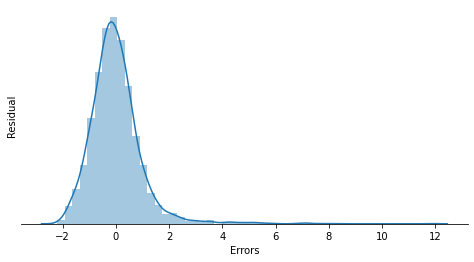

In [193]:
plt.figure(figsize=(8,4))
ax = sns.distplot(residual)


plt.ylabel('Residual')
plt.xlabel('Errors')
plt.yticks([])
sns.despine(left=True)

plt.show()

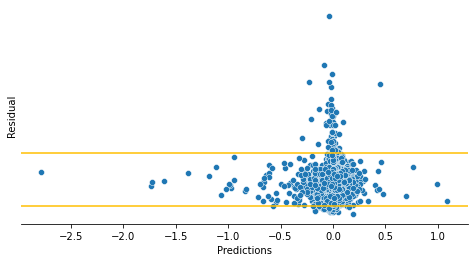

In [194]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=y_train_pred, y=residual)


plt.axhline(y=2.15, color='#FFBF00', linestyle='-')
plt.axhline(y=-1.65, color='#FFBF00', linestyle='-')

plt.ylabel('Residual')
plt.xlabel('Predictions')
plt.yticks([])
# plt.xticks([])
sns.despine(left=True)

plt.show()

# Observation:
- Residuals form a normal distribution with average around zero
- Residuals are **NOT** independent of each other
- Residuals have constant variance

# Conclusion

Since not all assumptions made my LinearRegression stand, we cannot apply LinearRegression or trust its result.